In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255,x_test/255
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
# model.summary()

In [5]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(True),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
             )
history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))
model.evaluate(x_test,y_test,verbose=2)

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9561 - val_loss: 0.0527 - val_sparse_categorical_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0326 - val_sparse_categorical_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.0434 - val_sparse_categorical_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0378 - val_sparse_categorical_accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0303 - val_sparse_categorical_accuracy: 0.9899
313/313 - 2s - loss: 0.0303 - sparse_categorical_accuracy: 0.9899


[0.03034098446369171, 0.9898999929428101]

In [6]:
history.history

{'loss': [0.14242273569107056,
  0.04413212835788727,
  0.03170007839798927,
  0.024270232766866684,
  0.020133689045906067],
 'sparse_categorical_accuracy': [0.9561166763305664,
  0.986549973487854,
  0.9901000261306763,
  0.9922333359718323,
  0.9939333200454712],
 'val_loss': [0.05266149342060089,
  0.032561294734478,
  0.043362539261579514,
  0.037802018225193024,
  0.03034098446369171],
 'val_sparse_categorical_accuracy': [0.9821000099182129,
  0.9894000291824341,
  0.9864000082015991,
  0.9876999855041504,
  0.9898999929428101]}

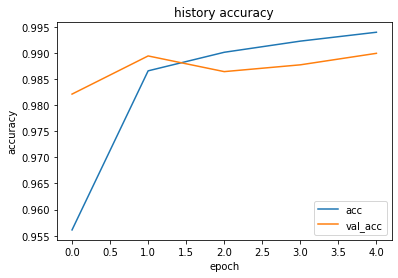

In [7]:
plt.plot(history.history['sparse_categorical_accuracy'],label='acc')
plt.plot(history.history['val_sparse_categorical_accuracy'],label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('history accuracy')
plt.show()